In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

***

### **DESCOMPRIMIR LA CARPETA "MNIST_datset.rar" siempre y cuando estes en GITHUB, para poder ejecutar en tu ordenador este notebook.**  


**Realice varios comentarios haciendo uso de una etiqueta html para darle color al comentario, pero al subir mis notebooks a GITHUB las secciones donde realice los comentarios a color aparecen en blanco. Sin embargo, esto no afecta en absoluto el contenido principal del documento, por lo que, si lo deseas, lo puedes ejecutar sin problema en tu ordenador.**

***

**PARA ESTA SECCIÓN, NO HAREMOS USO DE LOS DATOS DE TESTEO**, dado que el principal objetivo es mostrar los patrones formados por los pesos de la red, una vez se haya entrenado.

In [2]:
from mnist import MNIST

In [3]:
pwd

'C:\\Users\\Daniel\\Desktop\\RESPALDO UBUNTU\\BOOKS\\Grokking_Deep_Learning'

Esta base de datos de nombre Modified National Institute of Sandards and Technology (MNIST). Se compone de 10 clases, los números del 0 al 9.  

A continuación, cargamos estos datos:

In [4]:
Datos_MNIST = MNIST("MNIST_dataset") # Cargando todos los datos de MNIST.

In [5]:
imagenes_entrenamiento, etiquetas_entrenamiento = Datos_MNIST.load_training() # Cargando datos de entrenamiento.
imagenes_testeo, etiquetas_testeo = Datos_MNIST.load_testing() # Cargando datos para probar nuestra red una vez se halla entrenado.

Observamos el tipo de dato en el que se encuentran los datos de manera original:

In [6]:
print(type(imagenes_entrenamiento), type(etiquetas_entrenamiento))
print(type(imagenes_testeo), type(etiquetas_testeo))

<class 'list'> <class 'array.array'>
<class 'list'> <class 'array.array'>


***

Cambiamos los tipos de dato a "numpy.ndarray":

In [7]:
imagenes_entrenamiento, etiquetas_entrenamiento = np.asarray(imagenes_entrenamiento), np.asarray(etiquetas_entrenamiento)
imagenes_testeo, etiquetas_testeo = np.asarray(imagenes_testeo), np.asarray(etiquetas_testeo)

In [8]:
print(type(imagenes_entrenamiento), type(etiquetas_entrenamiento))
print(type(imagenes_testeo), type(etiquetas_testeo))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Una vez cambiando el tipo de dato a "numpy.ndarray" de los elementos, procedemos a ver sus dimensiones:

In [9]:
print(imagenes_entrenamiento.shape)
print(etiquetas_entrenamiento.shape)
################
print('\r')
################
print(imagenes_testeo.shape)
print(etiquetas_testeo.shape)

(60000, 784)
(60000,)

(10000, 784)
(10000,)


Como podemos ver, para el entrenamiento hay 60,000 datos, mientras que para el testeo sólo tenemos 10,000 datos.  

Si hacemos uso de el framework *Keras* para cargar nuestros datos de entrenamiento y testeo, tendríamos que las dimensiones son (#muestras, filas, columnas). Sin embargo, dado que no estamos haciendo uso de frameworks, nuestros datos ya cuentan con la dimensión fila y columnas aplanadas, es decir, de 3 dimensiones pasamos a tener 2 dimensiones (#muestras, filas\*columnas). Como último dato, cada muestra se compone de 28\*28 pixeles.

Procederemos a visualizar 3 muestras con su respectiva etiqueta:

Etiqueta: '5'


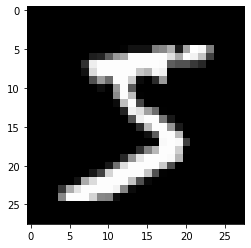

In [10]:
print(f"Etiqueta: '{etiquetas_entrenamiento[0]}'") # Seleccionamos el elemento que se encuentra en la posición 0.
plt.imshow(imagenes_entrenamiento[0].reshape(28,28), cmap="gray") # Seleccionamos la imagen correspondiente al elemento previo.

plt.show()

Etiqueta: '1'


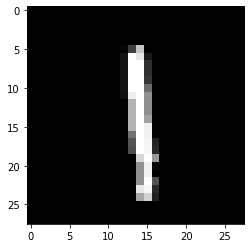

In [11]:
print(f"Etiqueta: '{etiquetas_entrenamiento[8]}'") # Seleccionamos el elemento que se encuentra en la posición 0.
plt.imshow(imagenes_entrenamiento[8].reshape(28,28), cmap="gray") # Seleccionamos la imagen correspondiente al elemento previo.

plt.show()

Etiqueta: '8'


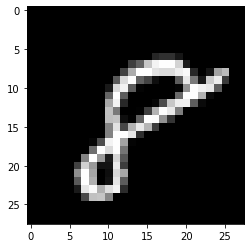

In [12]:
print(f"Etiqueta: '{etiquetas_entrenamiento[-1]}'") # Seleccionamos el elemento que se encuentra en la posición 59999.
plt.imshow(imagenes_entrenamiento[-1].reshape(28,28), cmap="gray") # Seleccionamos la imagen correspondiente al elemento previo.

plt.show()

Normalizamos las representaciones digitales de numeros de la base de datos MNIST:

In [13]:
imagenes_entrenamiento = (imagenes_entrenamiento/imagenes_entrenamiento.max()).astype("float64")

In [14]:
# Comprobamos que las imágenes de entrenamiento se hallan normalizado:
print(imagenes_entrenamiento.max())
print(imagenes_entrenamiento.min())

1.0
0.0


***

Debido a que vamos a crear nuestra red neuronal desde 0 sin hacer uso de librerías, sólo tomaremos las primeras 100 muestras de nuestros datos de entrenamiento. De otra forma, tardaría demasiado tiempo en entrenarse nuestra red.

In [15]:
muestra_imagenes = imagenes_entrenamiento[:100]
muestra_etiquetas = etiquetas_entrenamiento[:100]

Visualizamos las nuevas dimensiones de nuestros datos que serán usados para entrenar nuestra red:

In [16]:
print(muestra_imagenes.shape)
print(muestra_etiquetas.shape)

(100, 784)
(100,)


Como podemos observar, sólo contamos con las 1,000 muestradas deseadas.  

***

**Damos formato a nuestras etiquetas.**

In [17]:
def one_hot_encode (etiquetas):
    """Esta función nos arroja un vector one_hot para cada etiqueta."""
    
    cantidad_clases = len(set(etiquetas))
    vector_OneHot = np.zeros(shape=(etiquetas.shape[0], cantidad_clases), dtype="float64")
    
    for i in range(vector_OneHot.shape[0]):
        vector_OneHot[i,etiquetas[i]] = 1
        
    return vector_OneHot

In [18]:
muestra_etiquetas[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [19]:
vector = one_hot_encode(muestra_etiquetas)

print(vector.shape,'\n')
print(vector[:5,:])

(100, 10) 

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


<font color="darkorange">Si nosotros, en lugar de **1's** usaramos la respectiva etiqueta (por ejemplo, [0,0,0,3,0,0,0,0,0,0]), Tedríamos problemas con dos cosas.</font>

- La primera, el número 0 no tendría razón de ser, dado que todo el vector estaría conformado por 0's y nuestra red (específicamente para el número 0), no sabría diferenciar la entrada debido a que el vector de predicción probablemente tienda a tener el mismo valor en cada entrada.  

- La segunda, no habría un estándar o referencia para saber que etiqueta fue la inferida de manera correcta, es decir, suponiendo que obtenemos un vector de predicción como el siguiente: **[-0.04, 0.89, 1.99, 0.8, 2.8, 4.6, 5.5, 2.3, 4.4, 6.8]**, **en apariencia el valor inferido para la entrada es 9 (nuestra red cree que el número que ha ingresado a esta es el 9), lo anterior, debido a que el valor más alto se encuentra en la posición 9**. Sin embargo, como podemos darnos cuenta, el valor que se aproxima más a su respectiva etiqueta es el **2**, por ende, nosotros sabemos que en realidad el valor que la red esta infieriendo de acuerdo a la entrada ingresada es el **2**.

En conclusión, debemos hacer uso del vector **one hot encoded** con el objectivo de facilitar las predicciones y estandarizar las mismas. Es por ello, que hacemos uso de **1's** en la posición de la respectiva etiqueta en lugar de hacer uso de la etiqueta misma en su posición correspondiente.

***

**Procedemos a crear el algoritmo de entrenamiento de nuestra red. La arquitectura que usaremos es: 784 neuronas de entrada y 10 neuronas de salida. Como función de error seguiremos ocupando el Error Cuadrático Medio.**

In [46]:
import gc

def generador (x):
    """Esta función es un generador."""
    
    for i in range(x):
        
        yield i

def algoritmo_de_entrenamiento(entradas, pesos, salidas_deseadas, etiquetas, alfa, epocas):
    """Esta función ejecuta el algoritmo de entrenamiento de nuestra red."""
    
    error_minimo_total = float(input("\n¿Cuál deseas que sea el error mínimo de la red?: "))
    
    pesos_ = pesos.copy()
    
    error_red = list() # Guardará los errores cometidos durante el entrenamiento.
    precision_red = list() # Guardará la evolución de la precisión de nuestra red.
    
    iteracion = 0
    
    for iteraciones in generador(epocas+1):
        
        error_total_x_muestra = 0
        
        for muestra,salida_deseada in zip(entradas,salidas_deseadas):
            
            prediccion = muestra@pesos_
            
            error_total_x_muestra += np.sum((prediccion - salida_deseada)**2)

            # Gradiente:
            deltas = 2*(prediccion - salida_deseada)*1
            pesos_delta = deltas.reshape(1,-1).T.dot(muestra.reshape(1,-1))

            # Actualización parámetros:
            pesos_ -= alfa*pesos_delta.T
        
        print(f"Iteración número: {iteracion}")
        iteracion += 1
        
        predicciones_x_epoca = [np.argmax(entradas[i]@pesos_) for i in range(len(etiquetas))]
        total_aciertos = (predicciones_x_epoca == etiquetas).sum()
        precision_red.append((total_aciertos/len(etiquetas))*100)
        
        error_total = (error_total_x_muestra/len(salidas_deseadas))*100 # ECM dado en porcentaje D. Entrenamiento.
        error_red.append(error_total)
        print(f"Error total de la Red: {error_total}%\n")
        
        if error_total <= error_minimo_total: # Salimos del loop si el error de la red es menor o igual al deseado.
            print("\nNuestra red es menor o igual al error deseado.\n")
            break
            
        gc.collect()
            
    return pesos_, error_red, precision_red

**@** y **np.dot()** realizan exactamente la misma operación.

**Nota:** Recordemos que todavía no implementamos funciones de activación ni bias.  

Pasamos nuestros datos y entrenamos nuestra red:

In [23]:
np.random.seed(0)

numero_de_clases = len(set(muestra_etiquetas))
pesos_aleatorios = np.random.random(size=(muestra_imagenes.shape[1], numero_de_clases))
pesos_aleatorios.dtype="float64"

pesos_entrenados, errores, precision = algoritmo_de_entrenamiento(entradas=muestra_imagenes, pesos=pesos_aleatorios, salidas_deseadas=vector,
                                                                    etiquetas=muestra_etiquetas, alfa=0.01, epocas=500)

for i in range(5):
    gc.collect()


¿Cuál deseas que sea el error mínimo de la red?:  0


Iteración número: 0
Error total de la Red: 152516.06561205784%

Iteración número: 1
Error total de la Red: 178212.33008811303%

Iteración número: 2
Error total de la Red: 123514.49050065118%

Iteración número: 3
Error total de la Red: 119017.93129196098%

Iteración número: 4
Error total de la Red: 70461.10323638962%

Iteración número: 5
Error total de la Red: 99701.1719475799%

Iteración número: 6
Error total de la Red: 75803.36545094222%

Iteración número: 7
Error total de la Red: 110829.42484328733%

Iteración número: 8
Error total de la Red: 121501.48437357668%

Iteración número: 9
Error total de la Red: 67370.66856863724%

Iteración número: 10
Error total de la Red: 63408.10134409245%

Iteración número: 11
Error total de la Red: 24787.591982746027%

Iteración número: 12
Error total de la Red: 37215.64946044927%

Iteración número: 13
Error total de la Red: 60057.10921123042%

Iteración número: 14
Error total de la Red: 44116.8519723919%

Iteración número: 15
Error total de la Red: 3

***

Guardamos los pesosresultantes para esta configuración de entrenamiento:

In [27]:
import json

# Guardamos los pesos ya entrenados:
pesos_a_lista = [arreglo_pesos.tolist() for arreglo_pesos in pesos_entrenados] # Pasamos los arreglos a lista debido que estos no se pueden serializar.

nombre_archivo = "pesos_100M.json"
with open (nombre_archivo, 'w') as f_objeto:
    json.dump(pesos_a_lista,f_objeto)

**Para recuperar los pesos ya entrenados hacemos uso del siguiente código:**

In [ ]:
import json

nombre_archivo = r"pesos_100M.json"
with open (nombre_archivo, 'r') as f_objeto:
    pesos_cargados = json.load(f_objeto)
    
pesos_100M = np.asarray(pesos_cargados)
pesos_100M.shape

***

In [24]:
def suavizado_exponencial(puntos, factor):
    """Esta función realiza un suavizado exponencial."""
    
    puntos_suavizados = list()
    
    for punto in puntos:
        
        if puntos_suavizados:
            valor_previo = puntos_suavizados[-1]
            puntos_suavizados.append(valor_previo * factor + punto * (1 - factor))
            
        else:
            puntos_suavizados.append(punto)
            
    return puntos_suavizados

Graficamos el **Error en función del tiempo**:

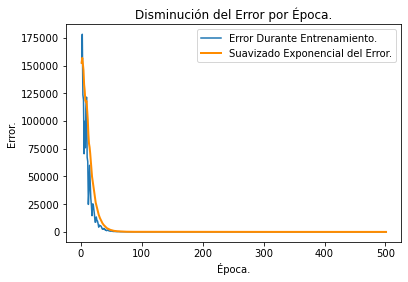

In [25]:
epocas = range(1,len(errores)+1)
plt.plot(epocas, errores, label="Error Durante Entrenamiento.")
plt.plot(epocas, suavizado_exponencial(errores, 0.83), color="darkorange", lw=2, label="Suavizado Exponencial del Error.")
plt.xlabel("Época.")
plt.ylabel("Error.")
plt.title("Disminución del Error por Época.")
plt.legend()

plt.show()

Graficamos la **Evolución de la precisión en función del tiempo**:

**Nota:** Al hablar de una gráfica en función del **tiempo**, nos referimos a la evolución del error o la precisión (según corresponda), en cada **época** de entrenamiento.

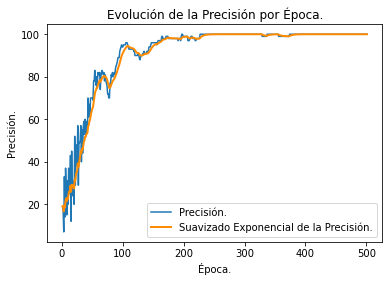

In [26]:
epocas = range(1,len(precision)+1)
plt.plot(epocas, precision, label="Precisión.")
plt.plot(epocas, suavizado_exponencial(precision, 0.83), color="darkorange", lw=2, label="Suavizado Exponencial de la Precisión.")
plt.xlabel("Época.")
plt.ylabel("Precisión.")
plt.title("Evolución de la Precisión por Época.")
plt.legend()

plt.show()

Realizamos inferencia haciendo uso de las últimas 3 imágenes de números con los pesos ya entrenados, y mostramos los vectores de predicción resultantes:

In [28]:
ultimos_3_vectores_de_prediccion = list()
for muestra in muestra_imagenes[-3:]:
    ultimos_3_vectores_de_prediccion.append(muestra@pesos_entrenados) # Guardamos al vector de predicción resultante.
    print(muestra@pesos_entrenados,'\n') # Imprimimos al vector de predicción resultante.

[0.14167838 0.03324605 0.03277402 0.04107577 0.10840538 0.15755676
 0.06622214 0.05631509 1.05051226 0.06475533] 

[ 0.01332495 -0.01349643 -0.00236233  0.99869631  0.01020593  0.02898613
 -0.00737492 -0.01186925 -0.01553279  0.00266344] 

[-0.01421364  1.00456965 -0.0060322  -0.00651854 -0.00283791 -0.00720798
 -0.00461314  0.00307227  0.00275174 -0.00632807] 



In [29]:
ultimas_3_predicciones = [np.argmax(ultimos_3_vectores_de_prediccion[i]) for i in range(len(muestra_imagenes[-3:]))]
print(ultimas_3_predicciones)
print(muestra_etiquetas[-3:])

[8, 3, 1]
[8 3 1]


Como podemos observar, la inferencia realizada en las últimas 3 imagenes de números se llevo a cabo correctamente.

<font color="blue">Como dato extra, podemos hacer uso de cualquier función de activación en nuestro vector predicción sin que esto modifique el resultado final:</font>

In [30]:
sigmoide = [[1/(1+np.exp(-x)) for x in V] for V in ultimos_3_vectores_de_prediccion]

In [31]:
for i in range(len(sigmoide)):
    print(np.asarray(sigmoide)[i].reshape(-1,1), '\n')

[[0.53536047]
 [0.50831075]
 [0.50819277]
 [0.5102675 ]
 [0.52707484]
 [0.53930791]
 [0.51654949]
 [0.51407505]
 [0.74087326]
 [0.51618318]] 

[[0.50333119]
 [0.49662594]
 [0.49940942]
 [0.73080218]
 [0.50255146]
 [0.50724602]
 [0.49815628]
 [0.49703272]
 [0.49611688]
 [0.50066586]] 

[[0.49644665]
 [0.73195608]
 [0.49849195]
 [0.49837037]
 [0.49929052]
 [0.49819801]
 [0.49884672]
 [0.50076807]
 [0.50068793]
 [0.49841799]] 



In [32]:
[np.argmax(sigmoide_aplicado_a_vector) for sigmoide_aplicado_a_vector in sigmoide]

[8, 3, 1]

Al analizar los valores de cada uno de los 3 vectores de prediccion a los cuales se les aplico la función sigmoide, *veremos que cada uno de los valores de cada vector conserva su posición.* Por otro lado, **si analizamos la gráfica del sigmoide o de cualquier otra función de activación entenderemos más a profundidad el "por qué" de esto.**

**Imprimimos los datos finales de nuestra red ya entrenada:**

In [33]:
etiquetas_inferidas = [np.argmax(muestra_imagenes[i]@pesos_entrenados) for i in range(len(muestra_etiquetas))]

In [35]:
print(f"Total de números en la muestra: {len(muestra_etiquetas)}")
print(f"Números acertados: {(etiquetas_inferidas == muestra_etiquetas).sum()}")
print(f"Porcentaje de Aciertos: {precision[-1]}%")
print(f"Error final de nuestra red en porcentaje: {errores[-1]}%")

Total de números en la muestra: 100
Números acertados: 100
Porcentaje de Aciertos: 100.0%
Error final de nuestra red en porcentaje: 2.5097226256263356%


**CONCLUSIÓN**  

**A pesar de que nuestra red memorizo (nuestra red sufre de overfitting), de manera correcta el 100% de los elementos, ¿Por qué el error total no disminuyo a 0 en su totalidad?. Esto se debe a que cada vector nos da un <font color="blue">aproximado</font> de la salida correspondiente**. Es decir, la posición con el valor más alto dentro del vector de predicción, será el elemento que la red haya seleccionado como la etiqueta correcta para los datos de entrada. **Por lo tanto, si los números fueran del 0 al 4 (cada numero se compone de 728 pixeles), nuestra red neuronal tuviese 4 neuronas de salida y, el vector de predicción fuese el siguiente: <font color="red">[0.0135, -0.4, 0.99, 0.88] </font>, la etiqueta seleccionada por nuestra red sería el 2, dado que el valor más alto se encuentra en esa posición.** Esto ocurre, con cada muestra. Por otro lado, **si al realizar inferencia con los pesos ya entrenados sobre una muestra X, y nuestro vector de predicción resultante correspondiese con la respectiva etiqueta de la muestra X en formato *one hot encode* (por ejemplo; [0,0,1,0]), y esto se cumpliese con cada una de las muestras, entonces con toda seguridad el error total de la red sería 0. <font color="orange">Entre más pequeño sea el error total, más segura estará nuestra red de la decisión que ha tomado.</font>**

*Recordemos que no aún no estamos trabajando con funciónes de activación ni bias. Por lo que nuestra red neuronal sólo realiza la predicción haciendo uso de la suma ponderada.*  

**<font color="red">Una red neuronal tiene la función de mapear las entradas con sus respectivas salidas.</font>**

***

**A continuación haremos uso (sólo con fines ilustrativos ya que esto lo veremos más adelante), de la función softmax con la finalidad de normalizar nuestros vectores de predicción o salida (ya que estos son resultado de las neuronas de salida):**

In [44]:
vector_prediccion = lambda i: muestra_imagenes[i]@pesos_entrenados

vectores_softmax = [[np.exp(prediccion)/np.exp(vector_prediccion(i)).sum() # Aplicamos la función softmax sobre cada elemente del respectivo vector de predicción.
          for prediccion in vector_prediccion(i)] # Obtenemos cada vector de predicción al realizar inferencia con los pesos ya entrenados.
         for i in range(len(muestra_etiquetas))] # Comodín para irnos desplazando sobre cada imagen (número), y obtener los vectores de predicción.

In [45]:
len(vectores_softmax)
# Como resultado tenemos 100 vectores normalizados, debido a que hemos entrenamos nuestro modelo con 100 imagenes de números (784 pixeles x imagen).

100

Ahora, sumaremos exclusivamente los elementos de cada vector normalizado, de tal manera que el resultado sea un vector columna de 100x1:

In [46]:
sumatoria_x_vector = [sum(vector_softmax) for vector_softmax in vectores_softmax]

Imprimimos el valor máximo y mínimo de nuestro vector columna:

In [47]:
print(max(sumatoria_x_vector))
print(min(sumatoria_x_vector))

1.0000000000000004
0.9999999999999998


In [49]:
(np.asarray(sumatoria_x_vector) == 1).sum() # Sólo 54 vectores de predicción normalizados suman exacatamente 1. Es decir, los restantes se aproximan demasiado a 1.

54

**Al usar la función softmax normalizamos cada vector de predicción. Sin embargo, debido a que el valor de nuestros pesos y las entradas (pixeles normalizados), son números flotantes (para ser exactos, su tipo de dato es float64), que cuentan con una gran cantidad de números decimales, por lo que la normalización no es 100% exacta, es decir, al sumar cada vector normalizado el valor resultante en la mayoría de los casos no es exactamente 1, auque sí un valor muy aproximado a este.**

***

**A continuación imprimieros los patrones formados por los pesos entrenados en la primer red neuronal:**

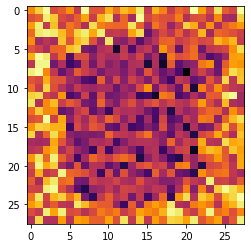

In [57]:
plt.imshow(pesos_entrenados[:,0].reshape(28,28), cmap="inferno")

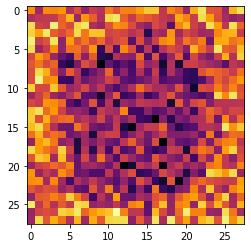

In [58]:
plt.imshow(pesos_entrenados[:,5].reshape(28,28), cmap="inferno")

<font color="darkorange">**Recordemos que sólo hemos usado 100 muestras para este entrenamiento, por lo tanto los patrones presentes no son muy visibles, lo que se traduce en una baja acertividad por parte de nuestra red, la cual seguramente fallará demasiado al intentar inferir imágenes de números que jamás ha visto. *He aquí la importancia de recopilar una gran cantidad de datos para entrenar nuestras redes neuronales.***</font>

***

<font color="red">**REENTRENAREMOS NUESTRA RED CON TODAS LAS MUESTRAS PARA PODER OBSERVAR CON MAYOR CLARIDAD LOS PATRONES FORMADOS POR LOS NUEVOS PESOS RESULTANTES:**</font>

In [61]:
muestra_imagenes_2 = imagenes_entrenamiento[:]
muestra_etiquetas_2 = etiquetas_entrenamiento[:]

In [62]:
vector_2 = one_hot_encode(muestra_etiquetas_2) # Damos formato de codificación one_hot a cada etiqueta.

In [63]:
np.random.seed(100)

numero_de_clases = len(set(muestra_etiquetas_2))
pesos_aleatorios_2 = np.random.random(size=(muestra_imagenes_2.shape[1], numero_de_clases))
pesos_aleatorios_2.dtype="float64"

pesos_entrenados_2, errores_2, precision_2 = algoritmo_de_entrenamiento(entradas=muestra_imagenes_2, pesos=pesos_aleatorios_2, salidas_deseadas=vector_2,
                                                                    etiquetas=muestra_etiquetas_2, alfa=0.001, epocas=500)

for i in range(5):
    gc.collect()


¿Cuál deseas que sea el error mínimo de la red?:  0


Iteración número: 0
Error total de la Red: 832.2775969226307%

Iteración número: 1
Error total de la Red: 89.69181119896969%

Iteración número: 2
Error total de la Red: 66.67760157685336%

Iteración número: 3
Error total de la Red: 58.15057954769236%

Iteración número: 4
Error total de la Red: 53.76974763714516%

Iteración número: 5
Error total de la Red: 51.13297627963082%

Iteración número: 6
Error total de la Red: 49.38594942274308%

Iteración número: 7
Error total de la Red: 48.15000068911606%

Iteración número: 8
Error total de la Red: 47.23294850480956%

Iteración número: 9
Error total de la Red: 46.527598784519434%

Iteración número: 10
Error total de la Red: 45.96972327190118%

Iteración número: 11
Error total de la Red: 45.51858007916263%

Iteración número: 12
Error total de la Red: 45.14709496779709%

Iteración número: 13
Error total de la Red: 44.83657253672242%

Iteración número: 14
Error total de la Red: 44.573685421954394%

Iteración número: 15
Error total de la Red: 44.3

***

Guardamos los pesos para esta segunda configuración de entrenamiento:

In [64]:
import json

pesos_a_lista_2 = [peso.tolist() for peso in pesos_entrenados_2] # Pasamos los arreglos a lista debido que estos no se pueden serializar.

nombre_archivo = "pesos_60000M.json"
with open (nombre_archivo, 'w') as f_objeto:
    json.dump(pesos_a_lista_2,f_objeto)

**Si deseamos recuperar los pesos ya entrenados para esta configuración hacemos uso del siguiente código:**

In [18]:
import json

nombre_archivo = r"pesos_60000M.json"
with open (nombre_archivo, 'r') as f_objeto:
    pesos_cargados_2 = json.load(f_objeto)
    
pesos_60000M = np.asarray(pesos_cargados_2)
pesos_60000M.shape

(784, 10)

***

Datos generales de nuestra red ya entrenada:

In [73]:
etiquetas_inferidas = [np.argmax(muestra_imagenes_2[i]@pesos_entrenados_2) for i in range(len(muestra_etiquetas_2))]
print(f"Total de números ingresados a la red: {len(muestra_etiquetas_2)}")
print(f"Números acertados: {(etiquetas_inferidas == muestra_etiquetas_2).sum()}")
print(f"Porcentaje de Aciertos: {((etiquetas_inferidas == muestra_etiquetas_2).sum()/len(muestra_etiquetas_2))*100}%")

Total de números ingresados a la red: 60000
Números acertados: 48230
Porcentaje de Aciertos: 80.38333333333333%


***

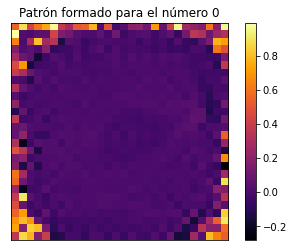

In [66]:
patron_0 = plt.imshow(pesos_entrenados_2[:,0].reshape(28,28), cmap="inferno")
plt.xticks([])
plt.yticks([])
plt.title("Patrón formado para el número 0")
plt.colorbar(patron_0)
plt.show()

In [67]:
# Rango de oscilación del valor de los pesos para este patrón en específico:
print(pesos_entrenados_2[:,0].max())
print(pesos_entrenados_2[:,0].min())

0.9921906895152471
-0.28278981067845066


**Patrón formado por los pesos pertenecientes a la neurona de salida que se corresponde con la etiqueta 0.**

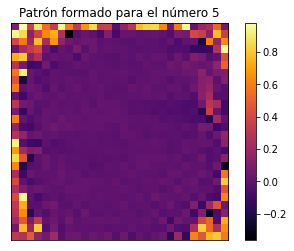

In [68]:
patron_5 = plt.imshow(pesos_entrenados_2[:,5].reshape(28,28), cmap="inferno")
plt.xticks([])
plt.yticks([])
plt.title("Patrón formado para el número 5")
plt.colorbar(patron_5)
plt.show()

In [69]:
# Rango de oscilación del valor de los pesos para este patrón en específico:
print(pesos_entrenados_2[:,5].max())
print(pesos_entrenados_2[:,5].min())

0.9786237847073697
-0.3636096797223331


**Patrón formado por los pesos pertenecientes a la neurona de salida que se corresponde con la etiqueta 5.**

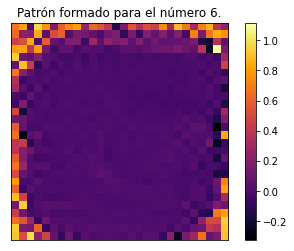

In [70]:
patron_6 = plt.imshow(pesos_entrenados_2[:,6].reshape(28,28), cmap="inferno")
plt.xticks([])
plt.yticks([])
plt.title("Patrón formado para el número 6.")
plt.colorbar(patron_6)
plt.show()

In [71]:
# Rango de oscilación del valor de los pesos para este patrón en específico:
print(pesos_entrenados_2[:,6].max())
print(pesos_entrenados_2[:,6].min())

1.1148548333576918
-0.32493192859212744


**Patrón formado por los pesos pertenecientes a la neurona de salida que se corresponde con la etiqueta 6.**

Rango de oscilación principal del valor de los pesos:

In [72]:
print(pesos_entrenados_2.max())
print(pesos_entrenados_2.min())

1.1148548333576918
-0.49476728693756966


<font color="green">Como se observa, los patrones no se aprecian muy claramente debido a que nuestra arquitectura de red es muy sencilla. No hace uso de funciones de activación, bias, etc. Por otro lado, los valores de los pesos que forman los patrones correspondientes a las distintas neuronas de salida varían. Sin embargo, el rango principal (para esta red neuronal), esta dado por: **-0.49 < pesos < 1.115**, el cual corresponde al rango de oscilación de los pesos pertenecientes a la neurona cuya etiqueta es el número 6.</font>

**CADA PESO MAPEA LA RELACIÓN QUE EXISTE ENTRE LA ENTRADA Y LA NEURONA DE SALIDA.**  

<font color="purple">**Si el peso tiene un valor alto (representado por un color amarillo más brillante), significa que existe una correlación directa entre la entrada y su respectiva neurona de salida. Por otro lado, si el valor del peso es negativo (se encuentra de color negro), la correlación que se presenta podría interpretarse como negativa, es decir, la ausencia de esos pixeles no son parte del patrón formado por el número correspondiente. Por otro lado, los valores que se encuentren entre el más valor alto, y el más pequeño son representados con una gama de colores entre el amarillo y el negro (rojo, cafe, etc). Es decir, presentan matices.**</font>

***

A continuación presentaremos de forma más clara el patrón formado en los pesos. Para este modelo **he usado *keras* y las 60,000 muestras que componen al conjunto de entrenamiento total de la base de datos MNIST. La arquitectura seleccionada fue:  

- 784 neuronas de entrada, 10 neuronas de salida, la función de activación *softmax* y 1 bias por cada neurona de salida**.  
- Función de Error = "binary_crossentropy" (entropía binaria cruzada). Se usa cuando tenemos más de 2 neuronas de salida. Aunque como ya vimos se pueden ocupar cualquier otra función de error.
- Optimizador = "rmsprop". Este el optimizador por default en keras y más adelante hablaremos sobre el mismo. De momento, sólo es importante saber que acelera en gran medida el entrenamiento de nuestra red comparado con el descenso del gradiente clásico.
- Métrica = "accuracy" (precisión). Esta métrica nos servirá para saber que tan precisa es nuestra red en cada etapa de entrenamiento.
- Cantidad de muestras por lote (batch_size) = 128. Ingresaremos 128 muestras al mismo tiempo a nuestra red, y así hasta ingresar las 60,000 muestras. Esto también acelera el aprendizaje de nuestra red y evita que nos estanquemos en los mínimos locales de la función de error.
- Épocas de entrenamiento = 8. Si entrenaramos nuestro modelo más épocas, los patrones se vuelverían más complejos y por ende más difíciles de apreciar.


Justifico que el uso de *keras* tiene como objetivo agilizar el aprendizaje aprovechando al máximo los recursos del computador, reduciendo así el tiempo de entrenamiento y obteniendo un patrón más claro en los pesos en el menor tiempo posible.

**NOTA:** Consultar el siguiente enlace para saber más sobre el optimizador "RMSprop": https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a

In [178]:
from PIL import Image

In [179]:
# Recuperamos las imagenes de las representaciones pesos:
numero_0 = np.asarray(Image.open("MNIST_dataset/numero_0.PNG").convert("RGB"))
numero_1 = np.asarray(Image.open("MNIST_dataset/numero_1.PNG").convert("RGB"))
numero_2 = np.asarray(Image.open("MNIST_dataset/numero_2.PNG").convert("RGB"))
numero_3 = np.asarray(Image.open("MNIST_dataset/numero_3.PNG").convert("RGB"))
numero_4 = np.asarray(Image.open("MNIST_dataset/numero_4.PNG").convert("RGB"))
numero_5 = np.asarray(Image.open("MNIST_dataset/numero_5.PNG").convert("RGB"))
numero_6 = np.asarray(Image.open("MNIST_dataset/numero_6.PNG").convert("RGB"))
numero_7 = np.asarray(Image.open("MNIST_dataset/numero_7.PNG").convert("RGB"))
numero_8 = np.asarray(Image.open("MNIST_dataset/numero_8.PNG").convert("RGB"))
numero_9 = np.asarray(Image.open("MNIST_dataset/numero_9.PNG").convert("RGB"))

In [180]:
Representaciones = [numero_0,numero_1,numero_2,numero_3,numero_4,numero_5,numero_6,numero_7,numero_8,numero_9]

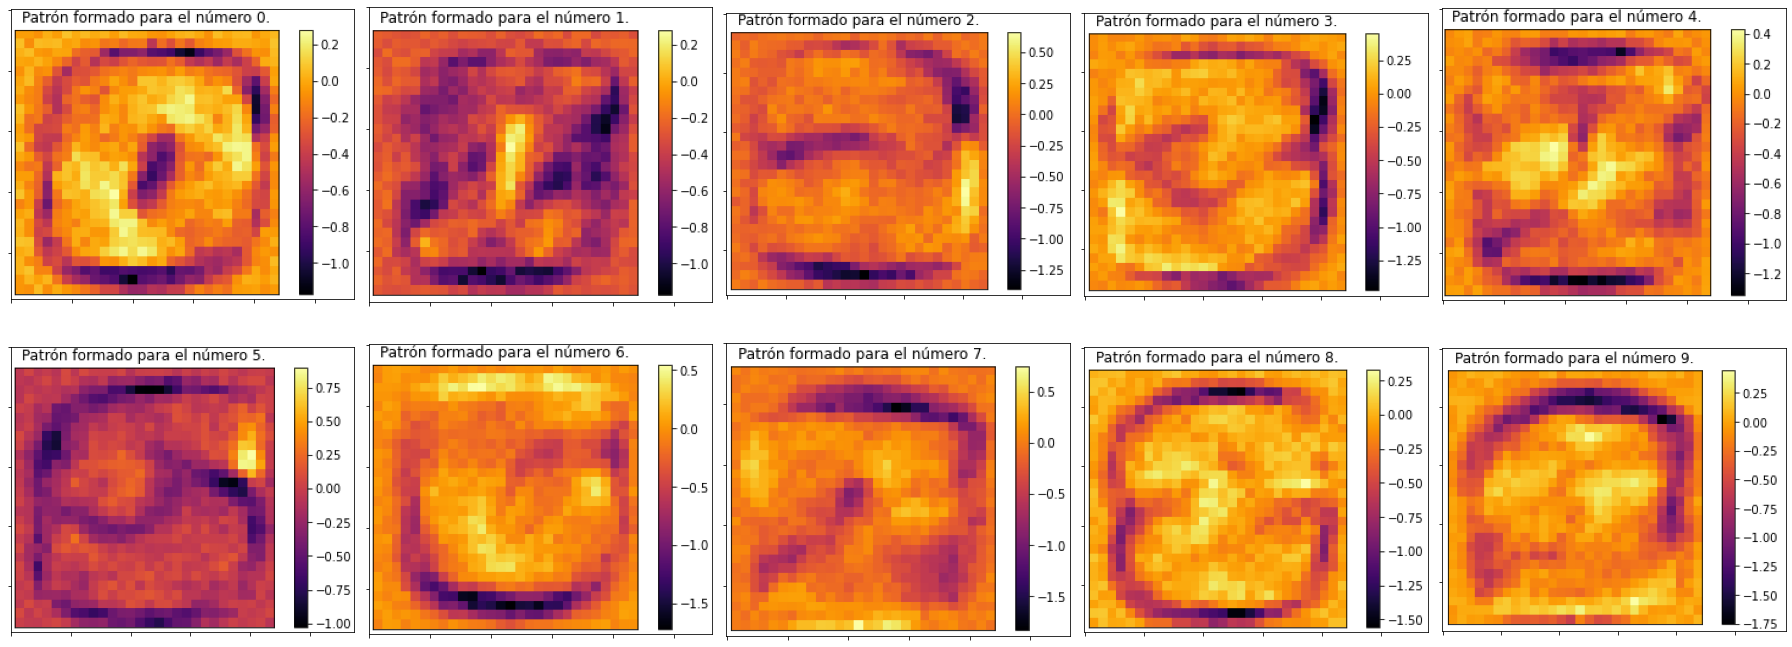

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10))

representacion = 0

for i in range(len(axes)):
    
    for j in range(axes.shape[1]):
        
        axes[i,j].imshow(Representaciones[representacion], cmap="viridis")
        axes[i,j].set_xticklabels([]) # Eliminamos las etiquetas y regla del eje X.
        axes[i,j].set_yticklabels([]) # Eliminamos las etiquetas y regla del eje Y.

        representacion += 1

plt.tight_layout()
plt.show()

Recuperamos los pesos pertenecientes a este modelo:

In [39]:
import json

nombre_archivo = r"pesos_Keras_60000M.json"
with open (nombre_archivo, 'r') as f_objeto:
    pesos_Keras = json.load(f_objeto)
    
pesos_Keras_60000M = [np.asarray(matriz_parametros) for matriz_parametros in pesos_Keras]

In [46]:
total_pesos_0 = sorted(list(pesos_Keras_60000M[0][:,0].copy()))
total_pesos_1 = sorted(list(pesos_Keras_60000M[0][:,1].copy()))
total_pesos_2 = sorted(list(pesos_Keras_60000M[0][:,2].copy()))
total_pesos_3 = sorted(list(pesos_Keras_60000M[0][:,3].copy()))
total_pesos_4 = sorted(list(pesos_Keras_60000M[0][:,4].copy()))
total_pesos_5 = sorted(list(pesos_Keras_60000M[0][:,5].copy()))
total_pesos_6 = sorted(list(pesos_Keras_60000M[0][:,6].copy()))
total_pesos_7 = sorted(list(pesos_Keras_60000M[0][:,7].copy()))
total_pesos_8 = sorted(list(pesos_Keras_60000M[0][:,8].copy()))
total_pesos_9 = sorted(list(pesos_Keras_60000M[0][:,9].copy()))

print(np.median(total_pesos_0))
print(np.median(total_pesos_1))
print(np.median(total_pesos_2))
print(np.median(total_pesos_3))
print(np.median(total_pesos_4))
print(np.median(total_pesos_5))
print(np.median(total_pesos_6))
print(np.median(total_pesos_7))
print(np.median(total_pesos_8))
print(np.mean(total_pesos_9))

-0.09691455587744713
-0.16560953855514526
-0.04772547818720341
-0.0451988261193037
-0.12589599937200546
-0.06605418771505356
-0.08784041181206703
-0.06573718041181564
-0.08713656663894653
-0.20990985108214866


In [194]:
print(f"Matriz Pesos: {pesos_Keras_60000M[0].shape}") # Pesos.
print(f"Matriz Bias: {pesos_Keras_60000M[1].shape}") # Biases.

Matriz Pesos: (784, 10)
Matriz Bias: (10,)


SÓLO TOMAREMOS EN CUENTA A LOS PESOS, DADO QUE CON ESTOS HEMOS ESTADO TRABAJANDO.

Rango de oscilación principal de los pesos que corresponden a esta configuración de red neuronal:

In [197]:
print(f"Rango de oscilación principal de los pesos: {pesos_Keras_60000M[0].min()} < pesos < {pesos_Keras_60000M[0].max()}")

Rango de oscilación principal de los pesos: -1.8307816982269287 < pesos < 0.8984888195991516


En las imágenes se aprecia claramente que el valor de los pesos tiene rangos distintos para cada patrón.

Finalmente, se aprecia de manera "clara" el patrón de los pesos formados para cada una de sus correspondients neuronas de salida.

**NOTA:** Para consultar el notebook de esta red neuronal implementada en KERAS, consultar el notebook de nombre "Imprimiendo_Pesos". El link es el siguiente: https://colab.research.google.com/drive/1qCRaRj2SRkWg0eqRNFHhlVgaFoiZIkm6#scrollTo=dh_pEB-0PZOo"

***

Veamos "por qué" la representación del patrón para el **número 1** por parte de los pesos se van tan rara:

In [59]:
# Recuperamos la posición de los UNOs en el conjunto de entrenamiento:
UNOs = [posicion for numero, posicion in zip(muestra_etiquetas_2, range(len(muestra_etiquetas_2))) if numero == 1]

# Imprimimos cierta información de la lista "unos":
print(f"Cantidad de UNOs dentro del conjunto de entrenamiento: {len(UNOs)}\n")
print(UNOs[:30]) # Imprimimos las primeras 30 posiciones en donde se encuentra el "número 1" en el conjunto de entrenamiento.

Cantidad de UNOs dentro del conjunto de entrenamiento: 6742

[3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 72, 77, 78, 99, 102, 104, 105, 112, 113, 124, 128, 134, 152, 174, 177, 184, 200, 201, 205, 208]


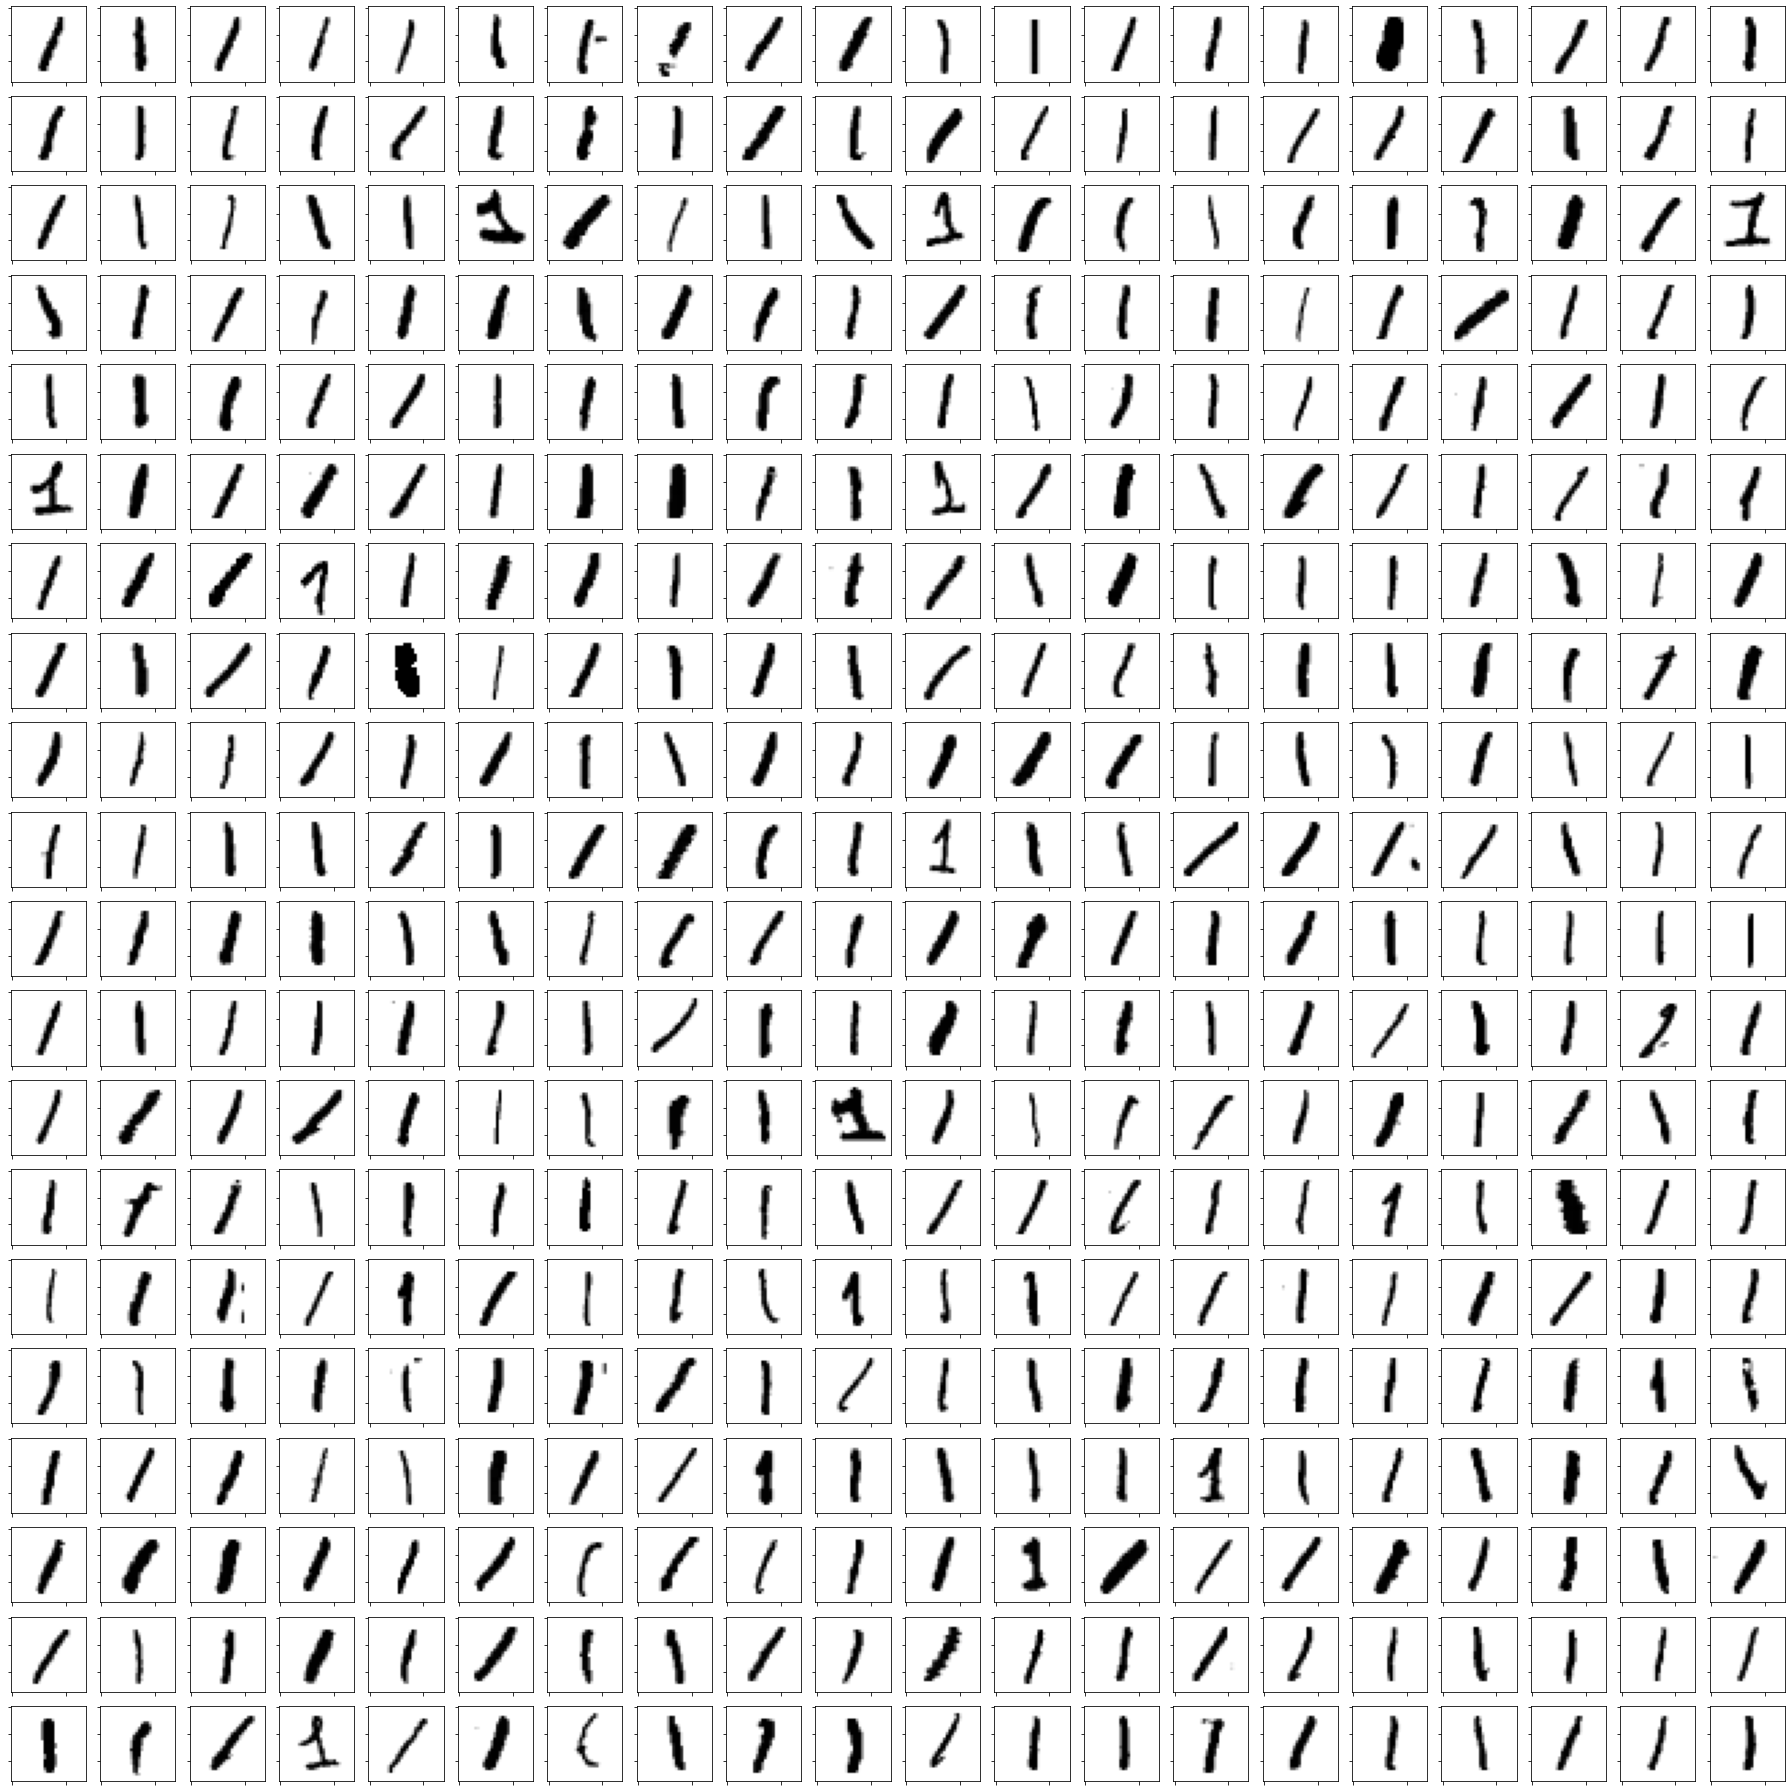

In [96]:
import random

random.Random(0).shuffle(UNOs) # Mezclamos la lista de posiciones para obtener de manera aleatoria muestras del "número 1".

fig, axes = plt.subplots(nrows=20, ncols=20, figsize=(25,25)) # Imprimieros 400 muestras del número 1.

posicion = 0

for i in range(len(axes)):
    
    for j in range(axes.shape[1]):
        
        axes[i,j].imshow(muestra_imagenes_2.reshape(60000,28,28)[UNOs[posicion]], cmap="binary") # Imprimimos cada muestra.
        axes[i,j].set_xticklabels([]) # Eliminamos las etiquetas y regla del eje X.
        axes[i,j].set_yticklabels([]) # Eliminamos las etiquetas y regla del eje Y.

        posicion += 1 # Va seleccionando las posiciones en las que se encuentran las muestras.

plt.tight_layout()
plt.show()

*Como se observa, hay una gran variedad de formas en las que se representan los UNOs, por esta razón la representación del número 1 por parte de los pesos es un poco extraña, ya que esta combina patrones de las distintas formas en las que el número 1 se representó en el conjunto de entrenamiento. Probablemente las representaciones de los números restantes (0,2,3,4,5,6,7,8,9), también varie pero en menor medida.*

***

<font color="red">**En conclusión, podriamos decir que la neurona de salida correspondiente a cada número conoce de manera general la forma del mismo. ¿Y a qué se debe esto? A los productos punto llevados a cabo en cada suma ponderada. Forman patrones. El producto punto para nuestros fines es una medida muy general de la relación entre dos vectores y es por esto que las neuronas de salida forman en sus respectivos pesos patrones muy parecidos a sus entradas correspondientes. En pocas palabras los pesos ya entrenados establecen una realición directa entre la entrada y la neurona de salida a la que pertenecen.**</red>